In [1]:
import tensorflow as tf
import numpy as np

# ÂØºÂÖ•ÂõæÂΩ¢Â∫ì
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Âä†ËΩΩscikit-learning
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# 07. ÂèçÂêë‰º†Êí≠ÁÆóÊ≥ï
Êú¨Á´†‰ªéÁêÜËÆ∫Â±ÇÈù¢Â≠¶‰π†Á•ûÁªèÁΩëÁªú‰∏≠ÁöÑÊ†∏ÂøÉÁÆóÊ≥ï‰πã‰∏ÄÔºö`ËØØÂ∑ÆÂèçÂêë‰º†Êí≠ÁÆóÊ≥ï`(BackpropagationÔºåÁÆÄÁß∞BP)„ÄÇ

Êúâ‰∫ÜÊ∑±Â∫¶Â≠¶‰π†Ê°ÜÊû∂Ëá™Âä®Ê±ÇÂØº„ÄÅËá™Âä®Êõ¥Êñ∞ÂèÇÊï∞ÁöÑÂäüËÉΩÔºåÁÆóÊ≥ïËÆæËÆ°ËÄÖÂá†‰πé‰∏çÈúÄË¶ÅÂØπÂèçÂêë‰º†Êí≠ÁÆóÊ≥ïÊúâÊ∑±ÂÖ•ÁöÑ‰∫ÜËß£‰πüÂèØ‰ª•Êê≠Âª∫Â§çÊùÇÁöÑÊ®°ÂûãÂíåÁΩëÁªúÔºåÈÄöËøáË∞ÉÁî®‰ºòÂåñÂ∑•ÂÖ∑ÂèØ‰ª•Êñπ‰æøÂú∞ËÆ≠ÁªÉÁΩëÁªúÊ®°Âûã„ÄÇ‰ΩÜÊòØÔºå`ÂèçÂêë‰º†Êí≠ÁÆóÊ≥ï`Âíå`Ê¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ï`ÊòØÁ•ûÁªèÁΩëÁªúÁöÑÊ†∏ÂøÉÁÆóÊ≥ïÔºåÊ∑±ÂàªÁêÜËß£ÂÖ∂Â∑•‰ΩúÂéüÁêÜÂçÅÂàÜÈáçË¶Å„ÄÇ

## 7.1 ÂØºÊï∞‰∏éÊ¢ØÂ∫¶
ÂØºÊï∞ÂÆö‰πâÔºö
+ $f'(x) = \frac{d\mathcal{y}}{d\mathcal{x}} = \lim_{\triangle x\to 0}\big(\frac{\triangle y}{\triangle x}\big) = \lim_{\triangle x\to 0}\big(\frac{f(x+\triangle x) - f(x)}{\triangle x}\big)$

‰ªéÂá†‰ΩïËßíÂ∫¶Êù•ÁúãÔºå‰∏ÄÂÖÉÂáΩÊï∞Âú®ÊüêÂ§ÑÁöÑÂØºÊï∞Â∞±ÊòØÂáΩÊï∞ÁöÑÂàáÁ∫øÂú®Ê≠§Â§ÑÁöÑÊñúÁéáÔºåÂç≥ÂáΩÊï∞ÂÄºÊ≤øÁùÄ$x$ÊñπÂêëÁöÑÂèòÂåñÁéá„ÄÇ

ÂÆûÈôÖ‰∏äÔºåÂØºÊï∞ÊòØ‰∏Ä‰∏™ÈùûÂ∏∏ÂÆΩÊ≥õÁöÑÊ¶ÇÂøµÔºåÂè™ÊòØÂõ†‰∏∫‰ª•ÂâçÊé•Ëß¶Âà∞ÁöÑÂáΩÊï∞Â§ßÂ§öÊòØ‰∏ÄÂÖÉÂáΩÊï∞ÔºåËá™ÂèòÈáè$\triangle x$Âè™Êúâ‰∏§‰∏™ÊñπÂêëÔºö$x^+$Âíå$x^-$„ÄÇÂΩìÂáΩÊï∞ÁöÑËá™ÂèòÈáèÊï∞Â§ß‰∫é‰∏Ä‰∏™Êó∂ÔºåÂáΩÊï∞ÁöÑÂØºÊï∞Ê¶ÇÂøµÊãìÂ±ï‰∏∫ÂáΩÊï∞ÂÄºÊ≤øÁùÄ‰ªªÊÑèÊñπÂêëÁöÑÂèòÂåñÁéá„ÄÇ

ÂØºÊï∞Êú¨Ë∫´ÊòØÊ†áÈáèÔºåÊ≤°ÊúâÊñπÂêëÔºå‰ΩÜÊòØÂØºÊï∞Ë°®ÂæÅ‰∫ÜÂáΩÊï∞ÂÄºÂú®Êüê‰∏™ÊñπÂêëÁöÑ‰∏äÂèòÂåñÁéá„ÄÇÂú®Ëøô‰∫õ‰ªªÊÑèÊñπÂêë‰∏≠ÔºåÊ≤øÁùÄÂùêÊ†áËΩ¥ÁöÑÂá†‰∏™ÊñπÂêëÊØîËæÉÁâπÊÆäÔºåÊ≠§Êó∂ÁöÑÂØºÊï∞‰πüÂè´‰Ωú`ÂÅèÂØºÊï∞`(Partial Derivative)„ÄÇÂ§öÂÖÉÂáΩÊï∞ÁöÑÂÅèÂØºÊï∞ÊòØÂØºÊï∞ÁöÑÁâπ‰æãÔºå‰πüÊ≤°ÊúâÊñπÂêë„ÄÇ

ËÄÉËôëÊú¨Ë¥®‰∏ä‰∏∫Â§öÂÖÉÂáΩÊï∞ÁöÑÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÔºåÊØîÂ¶Ç`shape`‰∏∫`[784, 256]`ÁöÑÊùÉÂÄºÁü©Èòµ$W$ÔºåÂÆÉÂåÖÂê´‰∫Ü$784 \times 256$‰∏™ËøûÊé•ÊùÉÂÄº$w$ÔºåÊàë‰ª¨ÈúÄË¶ÅÊ±ÇÂá∫$784 \times 256$‰∏™ÂÅèÂØºÊï∞„ÄÇÂà©Áî®Ê¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ï‰ºòÂåñÁΩëÁªúÊó∂ÔºåÈúÄË¶ÅÊ±ÇÂá∫ÁΩëÁªúÁöÑÊâÄÊúâÂÅèÂØºÊï∞„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨ÂÖ≥ÂøÉÁöÑ‰πüÊòØËØØÂ∑ÆÂáΩÊï∞ËæìÂá∫$\mathcal{L}$Ê≤øÁùÄËá™ÂèòÈáè$\theta_i$ÊñπÂêë‰∏äÁöÑÂØºÊï∞ÔºåÂç≥$\mathcal{L}$ÂØπÁΩëÁªúÂèÇÊï∞$\theta_i$ÁöÑÂÅèÂØºÊï∞Ôºö
+ $\nabla_\theta \mathcal{L} = \big(\displaystyle\frac{\partial \mathcal{L}}{\partial \theta_1},\frac{\partial \mathcal{L}}{\partial \theta_2},\frac{\partial \mathcal{L}}{\partial \theta_3},\dots \frac{\partial \mathcal{L}}{\partial \theta_n}\big)$

Ê¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÂèØ‰ª•ÊåâÁùÄÂêëÈáèÂΩ¢ÂºèËøõË°åÊõ¥Êñ∞Ôºö
+ $\theta' = \theta - \mu\cdot\nabla_\theta\mathcal{L}$

$\mu$ÊòØÂ≠¶‰π†Áéá„ÄÇ

ËøôÈáåÊääÂêëÈáè$\big(\displaystyle\frac{\partial \mathcal{L}}{\partial \theta_1},\frac{\partial \mathcal{L}}{\partial \theta_2},\frac{\partial \mathcal{L}}{\partial \theta_3},\dots \frac{\partial \mathcal{L}}{\partial \theta_n}\big)$Áß∞‰∏∫ÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶(Gradient)ÔºåÂÆÉÁî±ÊâÄÊúâÂÅèÂØºÊï∞ÁªÑÊàêÔºåË°®ÂæÅÊñπÂêë„ÄÇ

ÈÄöËøáÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÂπ∂‰∏çËÉΩ‰øùËØÅÂæóÂà∞ÂÖ®Â±ÄÊúÄ‰ºòËß£ÔºåËøô‰∏ªË¶ÅÊòØÁõÆÊ†áÂáΩÊï∞ÁöÑÈùûÂá∏ÊÄßÈÄ†ÊàêÁöÑ„ÄÇ 

Á•ûÁªèÁΩëÁªúÊ®°ÂûãÁöÑÂèÇÊï∞ÈáèÂèØËææÂçÉ‰∏á„ÄÅÊï∞‰∫øÁ∫ßÂà´ÔºåÂá†‰πéÊâÄÊúâÁöÑÁ•ûÁªèÁΩëÁªúÁöÑ‰ºòÂåñÈóÆÈ¢òÈÉΩÊòØ‰æùËµñ‰∫éÊ∑±Â∫¶Â≠¶‰π†Ê°ÜÊû∂ÂéªËá™Âä®ËÆ°ÁÆóÁΩëÁªúÂèÇÊï∞ÁöÑÊ¢ØÂ∫¶ÔºåÁÑ∂ÂêéÈááÁî®Ê¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÂæ™ÁéØËø≠‰ª£‰ºòÂåñÁΩëÁªúÁöÑÂèÇÊï∞Áõ¥Ëá≥ÊÄßËÉΩÊª°Ë∂≥ÈúÄÊ±Ç„ÄÇÊ∑±Â∫¶Â≠¶‰π†Ê°ÜÊû∂ËøôÈáå‰∏ªË¶ÅÂÆûÁé∞ÁöÑÁÆóÊ≥ïÂ∞±ÊòØÂèçÂêë‰º†Êí≠ÁÆóÊ≥ïÂíåÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÔºåÂõ†Ê≠§ÁêÜËß£Ëøô‰∏§‰∏™ÁÆóÊ≥ïÁöÑÂéüÁêÜÊúâÂà©‰∫é‰∫ÜËß£Ê∑±Â∫¶Â≠¶‰π†Ê°ÜÊû∂ÁöÑ‰ΩúÁî®„ÄÇ

Âú®‰ªãÁªçÂèçÂêë‰º†Êí≠ÁÆóÊ≥ï‰πãÂâçÔºåÊàë‰ª¨ÂÖà‰ªãÁªçÂØºÊï∞ÁöÑÂ∏∏ËßÅÂ±ûÊÄßÔºåÂ∏∏ËßÅÊøÄÊ¥ªÂáΩÊï∞„ÄÅÊçüÂ§±ÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶Êé®ÂØºÔºåÁÑ∂ÂêéÂÜçÊé®ÂØºÂ§öÂ±ÇÁ•ûÁªèÁΩëÁªúÁöÑÊ¢ØÂ∫¶‰º†Êí≠ËßÑÂæã„ÄÇ

## 7.2 ÂØºÊï∞Â∏∏ËßÅÊÄßË¥®
[Áï•]

## 7.3 ÊøÄÊ¥ªÂáΩÊï∞ÂØºÊï∞
ËøôÈáå‰ªãÁªçÁ•ûÁªèÁΩëÁªú‰∏≠Â∏∏Áî®ÁöÑÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂØºÊï∞Êé®ÂØº„ÄÇ

### 7.3.1 Sigmoid ÂáΩÊï∞ÂØºÊï∞
`Sigmoid`ÂáΩÊï∞Ë°®ËææÂºèÔºö
+ $\sigma(x) = \displaystyle\frac{1}{1+e^{-x}}$

ÂØºÊï∞‰∏∫Ôºö
+ $\displaystyle\frac{d\sigma(x)}{d\mathcal{x}}=\frac{d}{d\mathcal{x}}\big(\frac{1}{1+e^{-x}}\big) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{(1+e^{-x})-1}{(1+e^{-x})^2} = \frac{(1+e^{-x})}{(1+e^{-x})^2} - \frac{1}{(1+e^{-x})^2} = \sigma(x)-\sigma(x)^2$

<img src="images/07_02.png" style="width:300px;"/>

### 7.3.2 ReLU ÂáΩÊï∞ÂØºÊï∞
`ReLU`ÂáΩÊï∞ÁöÑË°®ËææÂºèÔºö
+ $\mathcal{ReLU}(x) = \max(0, x)$

ÂØºÊï∞‰∏∫Ôºö
+ $\displaystyle \frac{d}{d\mathcal{x}}\mathcal{ReLU} = \begin{cases} 1, & x \ge 0\\ 0, & x \lt 0 \end{cases}$

$\mathcal{ReLU}$ÂáΩÊï∞ÁöÑÂØºÊï∞Âú®$x$Â§ß‰∫éÁ≠â‰∫éÈõ∂ÁöÑÊó∂ÂÄôÊÅí‰∏∫1ÔºåÂú®ÂèçÂêë‰º†Êí≠ËøáÁ®ã‰∏≠ÔºåÂÆÉÊó¢‰∏ç‰ºöÊîæÂ§ßÊ¢ØÂ∫¶ÔºåÈÄ†Êàê`Ê¢ØÂ∫¶ÁàÜÁÇ∏`Áé∞Ë±°Ôºõ‰πü‰∏ç‰ºöÁº©Â∞èÊ¢ØÂ∫¶ÔºåÈÄ†Êàê`Ê¢ØÂ∫¶Âº•Êï£`Áé∞Ë±°„ÄÇ

<img src="images/07_03.png" style="width:300px;"/>

Âú®$\mathcal{ReLU}$ÂáΩÊï∞Ë¢´ÂπøÊ≥õÂ∫îÁî®‰πãÂâçÔºåÁ•ûÁªèÁΩëÁªú‰∏≠ÊøÄÊ¥ªÂáΩÊï∞ÈááÁî®`Sigmoid`Â±ÖÂ§öÔºå‰ΩÜÊòØ`Sigmoid`ÂáΩÊï∞ÂÆπÊòìÂá∫Áé∞`Ê¢ØÂ∫¶Âº•Êï£`Áé∞Ë±°(ÂèÇËÄÉ`sigmoid`ÂØºÊï∞ÁöÑÊõ≤Á∫ø)ÔºåÂΩìÁΩëÁªúÁöÑÂ±ÇÊï∞Â¢ûÂä†ÂêéÔºåËæÉÂâçÂ±ÇÁöÑÂèÇÊï∞Áî±‰∫éÊ¢ØÂ∫¶ÂÄºÈùûÂ∏∏ÂæÆÂ∞èÔºåÂèÇÊï∞ÈïøÊó∂Èó¥Âæó‰∏çÂà∞ÊúâÊïàÊõ¥Êñ∞ÔºåÊó†Ê≥ïËÆ≠ÁªÉËæÉÊ∑±Â±ÇÁöÑÁ•ûÁªèÁΩëÁªúÔºåÂØºËá¥Á•ûÁªèÁΩëÁªúÁöÑÁ†îÁ©∂‰∏ÄÁõ¥ÂÅúÁïôÂú®ÊµÖÂ±Ç„ÄÇ$\mathcal{ReLU}$ÂáΩÊï∞ÂæàÂ•ΩÂú∞ÁºìËß£‰∫ÜÊ¢ØÂ∫¶Âº•Êï£ÁöÑÁé∞Ë±°ÔºåÁ•ûÁªèÁΩëÁªúÁöÑÂ±ÇÊï∞ËÉΩÂ§üÂú∞ËææÂà∞ËæÉÊ∑±Â±ÇÊï∞ÔºåÂ¶Ç`AlexNet`‰∏≠ÈááÁî®‰∫Ü`ReLU`ÊøÄÊ¥ªÂáΩÊï∞ÔºåÂ±ÇÊï∞ËææÂà∞‰∫Ü8Â±ÇÔºåÂêéÁª≠ÊèêÂá∫ÁöÑ‰∏äÁôæÂ±ÇÁöÑÂç∑ÁßØÁ•ûÁªèÁΩëÁªú‰πüÂ§öÊòØÈááÁî®$\mathcal{ReLU}$ÊøÄÊ¥ªÂáΩÊï∞„ÄÇ

### 7.3.3 LeakyReLUÂáΩÊï∞ÂØºÊï∞
`LeakyReLU`ÂáΩÊï∞ÁöÑË°®ËææÂºèÔºö
+ $\displaystyle \mathcal{LeakyReLU} = \begin{cases} x, & x \ge 0\\ px, & x \lt 0 \end{cases}$

ÂØºÊï∞‰∏∫Ôºö
+ $\displaystyle \frac{d}{d\mathcal{x}}\mathcal{LeakyReLU} = \begin{cases} 1, & x \ge 0\\ 0, & p \lt 0 \end{cases}$

<img src="images/07_04.png" style="width:330px;"/>

### 7.3.4 TanhÂáΩÊï∞Ê¢ØÂ∫¶
`tanh`ÂáΩÊï∞ÁöÑË°®ËææÂºèÔºö
+ $\tanh(x) = \displaystyle\frac{(e^x-e^{-x})}{(e^x+e^{-x})} = 2 \cdot \text{sigmoid}(2x)‚àí1$

ÂØºÊï∞‰∏∫Ôºö
+ $\displaystyle \frac{d}{d\mathcal{x}}\mathcal{tanh} = 1-\mathcal{tanh}^2(x)$

<img src="images/07_05.png" style="width:300px;"/>

## 7.4 ÊçüÂ§±ÂáΩÊï∞Ê¢ØÂ∫¶
### 7.4.1 ÂùáÊñπËØØÂ∑ÆÂáΩÊï∞Ê¢ØÂ∫¶
ÂùáÊñπËØØÂ∑ÆÊçüÂ§±ÂáΩÊï∞Ë°®ËææÂºè‰∏∫Ôºö
+ $\mathcal{L} = \displaystyle\frac{1}{2}\sum_{k=1}^{K}(y_k-o_k)^2$

‰∏äÂºè‰∏≠ÁöÑ$\frac{1}{2}$È°πÁî®‰∫éÁÆÄÂåñËÆ°ÁÆóÔºå‰πüÂèØ‰ª•Âà©Áî®$\frac{1}{K}$ËøõË°åÂπ≥ÂùáÔºåËøô‰∫õÁº©ÊîæËøêÁÆóÂùá‰∏ç‰ºöÊîπÂèòÊ¢ØÂ∫¶ÊñπÂêë„ÄÇ

ÂÅèÂØºÊï∞‰∏∫Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial o_i} = \frac{1}{2}\sum_{k=1}^{K}\frac{\partial}{\partial o_i}(y_k-o_k)^2 = \sum_{k=1}^{K}(y_k-o_k)\frac{\partial (y_k-o_k)}{\partial o_i} = \sum_{k=1}^{K}(y_k-o_k)\cdot (-1)\cdot\frac{\partial o_k}{\partial o_i} = \sum_{k=1}^{K}(o_k-y_k)\frac{\partial o_k}{\partial o_i}$

ËÄÉËôëÂà∞$\displaystyle\frac{\partial o_k}{\partial o_i}$‰ªÖÂΩì$k=i$Êó∂Êâç‰∏∫1ÔºåÂÖ∂ÂÆÉÁÇπÈÉΩ‰∏∫0ÔºåÂùáÊñπËØØÂ∑ÆÂáΩÊï∞ÁöÑÂØºÊï∞ÂèØ‰ª•Êé®ÂØº‰∏∫Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial o_i} = (o_i-y_i)$

### 7.4.2 ‰∫§ÂèâÁÜµÂáΩÊï∞Ê¢ØÂ∫¶
ÂèÇËÄÉ[ÊñáÁ´†](https://www.yuque.com/zealotcat/gt9fc2/ru2i66)

Âú®ËÆ°ÁÆó‰∫§ÂèâÁÜµÊçüÂ§±ÂáΩÊï∞Êó∂Ôºå‰∏ÄËà¨Â∞Ü`Softmax`ÂáΩÊï∞‰∏é‰∫§ÂèâÁÜµÂáΩÊï∞Áªü‰∏ÄÂÆûÁé∞„ÄÇÊàë‰ª¨ÂÖàÊé®ÂØº`Softmax`ÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶ÔºåÂÜçÊé®ÂØº‰∫§ÂèâÁÜµÂáΩÊï∞ÁöÑÊ¢ØÂ∫¶„ÄÇ 

`Softmax`ÂáΩÊï∞ÁöÑË°®ËææÂºèÔºö
+ $\mathcal{Softmax}(z_i) = \displaystyle\frac{e^{z_i}}{\sum_{j=1}^{d_{out}}e^{z_j}}$

<img src="images/06_14.png" style="width:300px;"/>

ÂõûÈ°æÂØºÊï∞ÁöÑÂ∏∏ËßÅÊÄßË¥®ÔºåÂ§çÂêàÂáΩÊï∞$\displaystyle f(x) = \frac{g(x)}{h(x)}$ÁöÑÂØºÊï∞‰∏∫$\displaystyle f'(x) = \frac{g'(x)h(x)-h'(x)g(x)}{h(x^2)}$„ÄÇÂØπ‰∫é`Softmax`ÂáΩÊï∞Ôºå$g(x)=e^{z_i}, h(x)=\sum_{k=1}^{K}e^{z_k}$„ÄÇ

Êàë‰ª¨Âà©Áî®Ëøô‰∏™ÊÄßË¥®ÔºåÂπ∂‰∏îÊ†πÊçÆ$i == j$Âíå$i \ne j$ÂàÜÂà´ÂØπ`Softmax`ÂáΩÊï∞ËøõË°åÊ±ÇÂØº„ÄÇ

##### ÂΩì`i==j`Êó∂
Êúâ$\displaystyle\frac{\partial e^{z_i}}{\partial z_j} = e^{z_i}$ÔºåÂõ†Ê≠§Ôºö

+ $\displaystyle\frac{\partial p_i}{\partial z_j} = \frac{\partial\displaystyle\frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}}{\partial z_j} = \frac{e^{z_j}\sum_{k=1}^{K}e^{z_k}-e^{z_j}e^{z_i}}{(\sum_{k=1}^{K}e^{z_k})^2} = \frac{e^{z_j}\big(\sum_{k=1}^{K}e^{z_k}-e^{z_i}\big)}{(\sum_{k=1}^{K}e^{z_k})^2} = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}\times\frac{\big(\sum_{k=1}^{K}e^{z_k}-e^{z_i}\big)}{\sum_{k=1}^{K}e^{z_k}}$

Êàë‰ª¨Áü•ÈÅìÔºåÊâÄÊúâÁöÑÊ¶ÇÁéáÁõ∏Âä†‰∏∫1ÔºåÂç≥$\sum_{k=1}^{K}e^{z_k} = 1$ÔºåÊâÄ‰ª•Ôºö
+ $\displaystyle\frac{\partial p_i}{\partial z_j} = p_i(1-p_j), \ i==j$

##### ÂΩì`i!=j`Êó∂
Êúâ$\displaystyle\frac{\partial e^{z_i}}{\partial z_j} = 0$ÔºåÂõ†Ê≠§Ôºö

+ $\displaystyle\frac{\partial p_i}{\partial z_j} = \frac{\partial\displaystyle\frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}}{\partial z_j} = \frac{e^{z_j}\sum_{k=1}^{K}e^{z_k}-e^{z_j}e^{z_i}}{(\sum_{k=1}^{K}e^{z_k})^2} = \frac{0-e^{z_j}e^{z_i}}{(\sum_{k=1}^{K}e^{z_k})^2} = \frac{-e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}\times \frac{e^{z_i}}{\sum_{k=1}^{K}e^{z_k}} = -p_ip_j$

Âõ†Ê≠§ÂæóÂá∫`Softmax`ÂáΩÊï∞ÁöÑÂÅèÂØºÊï∞Â¶Ç‰∏ãÔºö
+ $\displaystyle\frac{\partial p_i}{\partial z_j} = \begin{cases} p_i(1-p_j), &  i==j \\ -p_i\cdot p_j, & i \ne j \end{cases}$

##### ‰∫§ÂèâÁÜµÊ¢ØÂ∫¶
‰∫§ÂèâÁÜµÊçüÂ§±ÂáΩÊï∞ÁöÑË°®ËææÂºèÔºö
+ $\mathcal{L} = \displaystyle ‚àí \sum_{k}y_k\log{(p_k)}$

ËøôÈáåÁõ¥Êé•Êé®ÂØº$\mathcal{L}$ÂØπÁΩëÁªúËæìÂá∫ÁöÑ$\mathcal{logits}$ÂèòÈáè$z_i$ÁöÑÂÅèÂØºÊï∞Ôºö
+ $\displaystyle \frac{\partial \mathcal{L}}{\partial z_i} = -\sum_{k}y_k\frac{\partial \log(p_k)}{\partial z_i}$

Â∞Ü$\log{h}$Â§çÂêàÂáΩÊï∞ÂàÜËß£ÂêéÂæóÂà∞Ôºö
+ $\displaystyle \frac{\partial \mathcal{L}}{\partial z_i} = -\sum_{k}y_k\cdot\frac{\partial \log(p_k)}{\partial p_k}\cdot \frac{\partial p_k}{\partial z_i} = -\sum_{k}y_k\cdot\frac{1}{p_k}\cdot \frac{\partial p_k}{\partial z_i}$

ÂÖ∂‰∏≠Ôºå$\displaystyle\frac{\partial p_k}{\partial z_i}$Â∞±ÊòØÊàë‰ª¨Â∑≤ÁªèÊé®ÂØºÁöÑ`Softmax`ÂáΩÊï∞ÁöÑÂÅèÂØºÊï∞„ÄÇÂ∞ÜÊ±ÇÂíåÁ¨¶Âè∑ÊãÜÂàÜ‰∏∫$k==i$Âíå$k!=i$‰∏§ÁßçÊÉÖÂÜµÔºå‰ª£ÂÖ•`Softmax`ÂáΩÊï∞ÁöÑÂÅèÂØºÊï∞ÂèØÂæóÔºö
+ $\displaystyle \frac{\partial \mathcal{L}}{\partial z_i} = -y_i(1-p_i)-\sum_{k\ne i}y_k\cdot\frac{1}{p_k}(-p_kp_i) = -y_i(1-p_i)+\sum_{k\ne i}y_k\cdot p_i = -y_i+y_ip_i+\sum_{k\ne i}y_k\cdot p_i = p_i\big(y_i+\sum_{k\ne i}y_k\big)-y_i$

ÁâπÂà´ÁöÑÔºåÂØπ‰∫éÂàÜÁ±ªÈóÆÈ¢ò‰∏≠Ê†áÁ≠æ$y$ÈÄöËøá`onehot`ÁºñÁ†ÅÁöÑÊñπÂºèÔºåÂàôÊúâÂ¶Ç‰∏ãÂÖ≥Á≥ªÔºö
+ $\displaystyle\sum_{k}y_k = 1$
+ $\displaystyle y_i+\sum_{k\ne i}y_k = 1$

Âõ†Ê≠§‰∫§ÂèâÁÜµÁöÑÂÅèÂØºÊï∞ÂèØ‰ª•Ëøõ‰∏ÄÊ≠•ÁÆÄÂåñ‰∏∫Ôºö
+ $\displaystyle \frac{\partial \mathcal{L}}{\partial z_i} = p_i-y_i$

## 7.5 ÂÖ®ËøûÊé•Â±ÇÊ¢ØÂ∫¶
Êú¨ËäÇ‰ªãÁªçÁ•ûÁªèÁΩëÁªúÁöÑÂèçÂêë‰º†Êí≠ÁÆóÊ≥ïÁöÑÊé®ÂØº„ÄÇÂÆûÈôÖ‰ΩøÁî®ÁöÑÁ•ûÁªèÁΩëÁªúÁöÑÁªìÊûÑÂ§öÁßçÂ§öÊ†∑ÔºåÊàë‰ª¨Â∞Ü‰ª•ÂÖ®ËøûÊé•Â±ÇÁΩëÁªú„ÄÅÊøÄÊ¥ªÂáΩÊï∞ÈááÁî®`Sigmoid`ÂáΩÊï∞„ÄÅËØØÂ∑ÆÂáΩÊï∞‰∏∫`Softmax+MSE`ÊçüÂ§±ÂáΩÊï∞ÁöÑÁ•ûÁªèÁΩëÁªú‰∏∫‰æãÔºåÊé®ÂØºÂÖ∂Ê¢ØÂ∫¶‰º†Êí≠ËßÑÂæã„ÄÇ

### 7.5.1 ÂçïÁ•ûÁªèÂÖÉÊ¢ØÂ∫¶
ÂØπ‰∫éÈááÁî®`Sigmoid`ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÁ•ûÁªèÂÖÉÊ®°ÂûãÔºåÂÆÉÁöÑÊï∞Â≠¶Ê®°ÂûãÂèØ‰ª•ÂÜô‰∏∫Ôºö
+ $o^{(1)} = \sigma({w^{(1)}}^Tx + b^{(1)})$

ÂÖ∂‰∏≠ÂèòÈáèÁöÑ‰∏äÊ†áË°®Á§∫Â±ÇÊï∞ÔºåÂ¶Ç$o^{(1)}$Ë°®Á§∫Á¨¨‰∏ÄÂ±ÇÁöÑËæìÂá∫Ôºå$x$Ë°®Á§∫ÁΩëÁªúÁöÑËæìÂÖ•ÔºåÊàë‰ª¨‰ª•ÊùÉÂÄºÂèÇÊï∞$w_{j1}$ÁöÑÂÅèÂØºÊï∞$\displaystyle\frac{\partial \mathcal{L}}{\partial w_{j1}}$Êé®ÂØº‰∏∫‰æã„ÄÇ

Á•ûÁªèÂÖÉÊ®°ÂûãÂ¶Ç`Âõæ7.7`ÊâÄÁ§∫ÔºåËæìÂÖ•ËäÇÁÇπÊï∞‰∏∫$\mathcal{J}$„ÄÇÂÖ∂‰∏≠ËæìÂÖ•Á¨¨$j$‰∏™ËäÇÁÇπÂà∞ËæìÂá∫$o^{(1)}$ÁöÑÊùÉÂÄºËøûÊé•ËÆ∞‰∏∫$w_{j1}^{(1)}$Ôºå‰∏äÊ†áË°®Á§∫ÊùÉÂÄºÂèÇÊï∞Â±û‰∫éÁöÑÂ±ÇÊï∞Ôºå‰∏ãÊ†áË°®Á§∫ÂΩìÂâçËøûÊé•ÁöÑËµ∑ÂßãËäÇÁÇπÂè∑ÂíåÁªàÊ≠¢ËäÇÁÇπÂè∑ÔºåÂ¶Ç$j1$Ë°®Á§∫‰∏ä‰∏ÄÂ±ÇÁöÑÁ¨¨$j$Âè∑ËäÇÁÇπÂà∞ÂΩìÂâçÂ±ÇÁöÑÁ¨¨1Âè∑ËäÇÁÇπ„ÄÇÁªèËøáÊøÄÊ¥ªÂáΩÊï∞$\sigma$‰πãÂâçÁöÑÂèòÈáèÂè´ÂÅö$z_1^{(1)}$ÔºåÁªèËøáÊøÄÊ¥ªÂáΩÊï∞$\sigma$‰πãÂêéÁöÑÂèòÈáèÂè´$o_1^{(1)}$ÔºåÁî±‰∫éÂè™Êúâ‰∏Ä‰∏™ËæìÂá∫ËäÇÁÇπÔºåÊïÖ$o_1^{(1)} = o^{(1)} = o$„ÄÇËæìÂá∫‰∏éÁúüÂÆûÊ†áÁ≠æ‰πãÈó¥ÈÄöËøáËØØÂ∑ÆÂáΩÊï∞ÂáΩÊï∞ËÆ°ÁÆóËØØÂ∑ÆÂÄºÔºåËØØÂ∑ÆÂÄºËÆ∞‰∏∫$\mathcal{L}$„ÄÇ

<img src="images/07_07.png" style="width:450px;"/>

Â¶ÇÊûúÊàë‰ª¨ÈááÁî®ÂùáÊñπËØØÂ∑ÆÂáΩÊï∞ÔºåËÄÉËôëÂà∞Âçï‰∏™Á•ûÁªèÂÖÉÂè™Êúâ‰∏Ä‰∏™ËæìÂá∫ÔºåÈÇ£‰πàÊçüÂ§±ÂèØ‰ª•Ë°®Ëææ‰∏∫Ôºö
+ $\mathcal{L} = \frac{1}{2}\big(o_1-t\big)^2$

ÂÖ∂‰∏≠$t$‰∏∫ÁúüÂÆûÊ†áÁ≠æÂÄºÔºåÊ∑ªÂä†$\frac{1}{2}$È°π‰ΩøÂæóËÆ°ÁÆóÊõ¥ÁÆÄ‰æøÔºå‰∏çÂΩ±ÂìçÊ¢ØÂ∫¶ÁöÑÊñπÂêë„ÄÇÊàë‰ª¨‰ª•ÊùÉÈáçÂèòÈáè$w_{j1}$‰∏∫‰æãËÆ°ÁÆóÊçüÂ§±ÂáΩÊï∞ÁöÑÂØºÊï∞Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{j1}} = (o_1-t)\frac{\partial o_1}{\partial w_{j1}} = (o_1-t)\frac{\partial \sigma(z_1)}{\partial w_{j1}}$

‰ª£ÂÖ•`Sigmoid`ÂáΩÊï∞ÁöÑÂØºÊï∞$\sigma'=\sigma(1-\sigma)$Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{j1}} = (o_1-t)\sigma(z_1)(1-\sigma(z_1))\frac{\partial \sigma(z_i)}{\partial w_{j1}} = (o_1-t)\cdot o_1\cdot(1-o_1)\frac{\partial \sigma(z_i)}{\partial w_{j1}}$

Áî±‰∫é$\frac{\partial \sigma(z_i)}{\partial w_{j1}} = x_j$Ôºå‰ª£ÂÖ•ÂæóÂà∞Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{j1}} = (o_1-t)\cdot o_1\cdot(1-o_1)x_j$

‰ªé‰∏äÂºèÂèØ‰ª•ÁúãÂà∞ÔºåËØØÂ∑ÆÂØπÊùÉÂÄº$w_{j1}$ÁöÑÂÅèÂØºÊï∞Âè™‰∏éËæìÂá∫ÂÄº$o_1$ „ÄÅÁúüÂÆûÂÄº$t$‰ª•ÂèäÂΩìÂâçÊùÉÂÄºËøûÊé•ÁöÑËæìÂÖ•$x$ÊúâÂÖ≥„ÄÇ

### 7.5.2 ÂÖ®ËøûÊé•Â±ÇÊ¢ØÂ∫¶
Êàë‰ª¨ÊääÂçï‰∏™Á•ûÁªèÂÖÉÊ®°ÂûãÊé®ÂπøÂà∞ÂçïÂ±ÇÁöÑÂÖ®ËøûÊé•Â±ÇÁöÑÁΩëÁªú‰∏äÔºåÂ¶Ç`Âõæ7.8`ÊâÄÁ§∫„ÄÇËæìÂÖ•Â±ÇÈÄöËøá‰∏Ä‰∏™ÂÖ®ËøûÊé•Â±ÇÂæóÂà∞ËæìÂá∫ÂêëÈáèÔºå‰∏éÁúüÂÆûÊ†áÁ≠æÂêëÈáèËÆ°ÁÆóÂùáÊñπËØØÂ∑Æ„ÄÇËæìÂÖ•ËäÇÁÇπÊï∞‰∏∫$J$ÔºåËæìÂá∫ËäÇÁÇπÊï∞‰∏∫$K$„ÄÇ

<img src="images/07_08.png" style="width:450px;"/>

Â§öËæìÂá∫ÁöÑÂÖ®ËøûÊé•ÁΩëÁªúÂ±ÇÊ®°Âûã‰∏éÂçï‰∏™Á•ûÁªèÂÖÉÊ®°Âûã‰∏çÂêå‰πãÂ§ÑÂú®‰∫éÔºåÂÆÉÂ§ö‰∫ÜÂæàÂ§öÁöÑËæìÂá∫ËäÇÁÇπ$o_1^{(1)},o_2^{(1)},o_3^{(1)},\dots,o_K^{(1)}$ÔºåÊØè‰∏™ËæìÂá∫ËäÇÁÇπÂàÜÂà´ÂØπÂ∫îÂà∞ÁúüÂÆûÊ†áÁ≠æ$t_1,t_2,t_3,\dots,t_k$„ÄÇ$w_{jk}$ÊòØËæìÂÖ•Á¨¨$j$Âè∑ËäÇÁÇπ‰∏éËæìÂá∫Á¨¨$k$Âè∑ËäÇÁÇπÁöÑËøûÊé•ÊùÉÂÄº„ÄÇÂùáÊñπËØØÂ∑ÆÂèØ‰ª•Ë°®Ëææ‰∏∫Ôºö
+ $\mathcal{L} = \displaystyle\frac{1}{2}\sum_{i=1}^{K}\big(o_i^{(1)}-t_i\big)^2$

Áî±‰∫é$\displaystyle\frac{\partial \mathcal{L}}{\partial w_{jk}}$Âè™‰∏éËäÇÁÇπ$o_k^{(1)}$ÊúâÂÖ≥ËÅîÔºå‰∏äÂºè‰∏≠ÁöÑÊ±ÇÂíåÁ¨¶Âè∑ÂèØ‰ª•ÂéªÊéâÔºåÂç≥$i=k$Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{jk}} = (o_k-t_k)\frac{\partial o_k}{\partial w_{jk}} = (o_k-t_k)\frac{\partial \sigma(z_k)}{\partial w_{jk}}$

Âú®‰ª£ÂÖ•`Sigmoid`ÂáΩÊï∞ÁöÑÂØºÊï∞Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{jk}} = (o_k-t_k)\cdot\sigma(z_k)\cdot(1-\sigma(z_k))\frac{\partial z_k^{(1)}}{\partial w_{jk}}$

‰ª£ÂÖ•$\sigma(z_k)=o_k$„ÄÅ$\displaystyle\frac{\partial z_k^{(1)}}{\partial w_{jk}}=x_j$ÔºåÂæóÂà∞Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{jk}} = (o_k-t_k)\cdot o_k\cdot(1-o_k)x_j$

Áî±Ê≠§ÂèØ‰ª•ÁúãÂà∞ÔºåÊüêÊù°ËøûÊé•$w_{jk}$‰∏äÈù¢ÁöÑÂÅèÂØºÊï∞ÔºåÂè™‰∏éÂΩìÂâçËøûÊé•ÁöÑËæìÂá∫ËäÇÁÇπ$o_k^{(1)}$„ÄÅÂØπÂ∫îÁöÑÁúüÂÆûÂÄºËäÇÁÇπÁöÑÊ†áÁ≠æ$t_k^{(1)}$„ÄÅ‰ª•ÂèäÂØπÂ∫îÁöÑËæìÂÖ•ËäÇÁÇπ$x$ÊúâÂÖ≥„ÄÇ

Êàë‰ª¨‰ª§$\delta_k = (o_k-t_k)\cdot o_k\cdot(1-o_k)$ÔºåÂàôÊ¢ØÂ∫¶ÂèØ‰ª•Ë°®Ëææ‰∏∫Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{jk}} =\delta_k\cdot x_j$

ÂÖ∂‰∏≠$\delta_k$ÂèòÈáèË°®ÂæÅËøûÊé•Á∫øÁöÑÁªàÊ≠¢ËäÇÁÇπÁöÑËØØÂ∑ÆÊ¢ØÂ∫¶‰º†Êí≠ÁöÑÊüêÁßçÁâπÊÄßÔºå‰ΩøÁî®$\delta_k$Ë°®Á§∫ÂêéÔºåÂÅèÂØºÊï∞Âè™‰∏éÂΩìÂâçËøûÊé•ÁöÑËµ∑ÂßãËäÇÁÇπ$x_j$ÔºåÁªàÊ≠¢ËäÇÁÇπÂ§Ñ$\delta_k$ÊúâÂÖ≥ÔºåÁêÜËß£Ëµ∑Êù•ÊØîËæÉÁÆÄÊ¥ÅÁõ¥ËßÇ„ÄÇÂêéÁª≠Êàë‰ª¨Â∞Ü‰ºöÂú®ÁúãÂà∞$\delta_k$Âú®Âæ™ÁéØÊé®ÂØºÊ¢ØÂ∫¶‰∏≠ÁöÑ‰ΩúÁî®„ÄÇ

Áé∞Âú®Â∑≤ÁªèÊé®ÂØºÂÆåÂçïÂ±ÇÁ•ûÁªèÁΩëÁªú(Âç≥ËæìÂá∫Â±Ç)ÁöÑÊ¢ØÂ∫¶‰º†Êí≠ÊñπÂºèÔºåÊé•‰∏ãÊù•Êàë‰ª¨Â∞ùËØïÊé®ÂØºÂÄíÊï∞Á¨¨‰∫åÂ±ÇÁöÑÊ¢ØÂ∫¶‰º†Êí≠ÊñπÂºè„ÄÇÂÆåÊàê‰∫ÜÂÄíÊï∞Á¨¨‰∫åÂ±ÇÁöÑ‰º†Êí≠Êé®ÂØºÂêéÔºåÂ∞±ÂèØ‰ª•Á±ª‰ººÂú∞ÔºåÂæ™ÁéØÂæÄÂ§çÊé®ÂØºÊâÄÊúâÈöêËóèÂ±ÇÁöÑÊ¢ØÂ∫¶‰º†Êí≠ÊñπÂºèÔºå‰ªéËÄåËé∑ÂæóÊâÄÊúâÂ±ÇÂèÇÊï∞ÁöÑÊ¢ØÂ∫¶ËÆ°ÁÆóË°®ËææÂºè„ÄÇ

Âú®‰ªãÁªçÂèçÂêë‰º†Êí≠ÁÆóÊ≥ï‰πãÂâçÔºåÊàë‰ª¨ÂÖàÂ≠¶‰π†ÂØºÊï∞‰º†Êí≠ÁöÑ‰∏Ä‰∏™Ê†∏ÂøÉÊ≥ïÂàôÔºö**ÈìæÂºèÊ≥ïÂàô**„ÄÇ

## 7.6 ÈìæÂºèÊ≥ïÂàô
ÈìæÂºèÊ≥ïÂàôÂèØ‰ª•Âú®‰∏çÊòæÂºèÊé®ÂØºÁ•ûÁªèÁΩëÁªúÁöÑÊï∞Â≠¶Ë°®ËææÂºèÁöÑÊÉÖÂÜµ‰∏ãÔºåÈÄêÂ±ÇÊé®ÂØºÊ¢ØÂ∫¶ÁöÑÊ†∏ÂøÉÂÖ¨ÂºèÔºåÈùûÂ∏∏ÈáçË¶Å„ÄÇ

ËÄÉËôë$y = f(u)Ôºåu = g(x)$ÔºåÂàôÔºö
+ $\displaystyle\frac{dy}{dx} = \frac{dy}{du}\cdot\frac{du}{dx} = f'(g(x))g'(x)$

Á•ûÁªèÁΩëÁªúÁöÑÊçüÂ§±ÂáΩÊï∞$\mathcal{L}$Êù•Ëá™‰∫éÂêÑ‰∏™ËæìÂá∫ËäÇÁÇπ$o_k^{K}$ÔºåÂ¶Ç`Âõæ7.9`ÊâÄÁ§∫ÔºåÂÖ∂‰∏≠ËæìÂá∫ËäÇÁÇπ$o_k^{K}$Âèà‰∏éÈöêËóèÂ±ÇÁöÑËæìÂá∫ËäÇÁÇπ$o_j^{J}$Áõ∏ÂÖ≥ËÅîÔºåÂõ†Ê≠§ÈìæÂºèÊ≥ïÂàôÈùûÂ∏∏ÈÄÇÂêà‰∫éÁ•ûÁªèÁΩëÁªúÁöÑÊ¢ØÂ∫¶Êé®ÂØº„ÄÇ

<img src="images/07_09.png" style="width:400px;"/>

Êàë‰ª¨ÂàÜÊûê‰∏Ä‰∏ãÊçüÂ§±ÂáΩÊï∞$\mathcal{L}$Â¶Ç‰ΩïÂ∫îÁî®ÈìæÂºèÊ≥ïÂàô„ÄÇÂâçÂêë‰º†Êí≠Êó∂ÔºåÊï∞ÊçÆÁªèËøá$w_{ij}^{(J)}$‰º†Âà∞ÂÄíÊï∞Á¨¨‰∫åÂ±ÇÁöÑËäÇÁÇπ$o_j^{(J)}$ÔºåÂÜç‰º†Êí≠Âà∞ËæìÂá∫Â±ÇÁöÑËäÇÁÇπ$o_k^{(K)}$„ÄÇÂú®ÊØèÂ±ÇÂè™Êúâ‰∏Ä‰∏™ËäÇÁÇπÊó∂Ôºå$\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}^{(J)}}$ÂèØ‰ª•Âà©Áî®ÈìæÂºèÊ≥ïÂàôÔºåÈÄêÂ±ÇÂàÜËß£‰∏∫Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}^{(J)}} = \displaystyle\frac{\partial \mathcal{L}}{\partial o_j^{(J)}}\cdot\frac{\partial o_j^{(J)}}{\partial w_{ij}^{(J)}} = \frac{\partial \mathcal{L}}{\partial o_k^{(K)}}\cdot\frac{\partial o_k^{(K)}}{\partial o_j^{(J)}}\cdot\frac{\partial o_j^{(J)}}{\partial w_{ij}^{(J)}}$

ÂÖ∂‰∏≠$\displaystyle\frac{\partial L}{\partial o_k^{(K)}}$ÂèØ‰ª•Áî±ËØØÂ∑ÆÂáΩÊï∞Áõ¥Êé•Êé®ÂØºÂá∫Ôºå$\displaystyle\frac{\partial o_k^{(K)}}{\partial o_j^{(J)}}$ÂèØ‰ª•Áî±ÂÖ®ËøûÊé•Â±ÇÂÖ¨ÂºèÊé®ÂØºÂá∫Ôºå$\displaystyle\frac{\partial o_j^{(J)}}{\partial w_{ij}^{(J)}}$ÁöÑÂØºÊï∞Âç≥‰∏∫ËæìÂÖ•$x_i^{(I)}$„ÄÇÂèØ‰ª•ÁúãÂà∞ÔºåÈÄöËøáÈìæÂºèÊ≥ïÂàôÔºåÊàë‰ª¨Â∞ÜÂÅèÂØºÊï∞ËøõË°åÂàÜËß£ÔºåÂ±ÇÂ±ÇËø≠‰ª£Âç≥ÂèØÊé®ÂØºÂá∫„ÄÇ

ËøôÈáåÁÆÄÂçï‰ΩøÁî®`TensorFlow`Ëá™Âä®Ê±ÇÂØºÂäüËÉΩÔºåÊù•‰ΩìÈ™åÈìæÂºèÊ≥ïÂàôÁöÑÈ≠ÖÂäõÔºö

In [2]:
# ÊûÑÂª∫ÂæÖ‰ºòÂåñÂèòÈáè
x = tf.constant(1.)
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)

# ÊûÑÂª∫Ê¢ØÂ∫¶ËÆ∞ÂΩïÂô®
with tf.GradientTape(persistent=True) as tape:
    # Èùûtf.VariableÁ±ªÂûãÁöÑÂº†ÈáèÈúÄË¶Å‰∫∫‰∏∫ËÆæÁΩÆËÆ∞ÂΩïÊ¢ØÂ∫¶‰ø°ÊÅØ
    tape.watch([w1, b1, w2, b2])
    # ÊûÑÂª∫2Â±ÇÁ∫øÊÄßÁΩëÁªú
    y1 = x * w1 + b1
    y2 = y1 * w2 + b2

# Áã¨Á´ãÊ±ÇËß£Âá∫ÂêÑ‰∏™ÂÅèÂØºÊï∞
dy2_dy1 = tape.gradient(y2, [y1])[0]
dy1_dw1 = tape.gradient(y1, [w1])[0]
dy2_dw1 = tape.gradient(y2, [w1])[0]

# È™åËØÅÈìæÂºèÊ≥ïÂàôÔºå2‰∏™ËæìÂá∫Â∫îÁõ∏Á≠â
print(dy2_dy1 * dy1_dw1)
print(dy2_dw1)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


ÂèØ‰ª•ÁúãÂà∞Ôºå$\displaystyle\frac{\partial y_2}{\partial y_1}\cdot\frac{\partial y_1}{\partial w_1} = \frac{\partial y_2}{\partial w_1}$ÔºåÂÅèÂØºÊï∞ÁöÑ‰º†Êí≠ÊòØÁ¨¶ÂêàÈìæÂºèÊ≥ïÂàôÁöÑ„ÄÇ

## 7.7 ÂèçÂêë‰º†Êí≠ÁÆóÊ≥ï
Áé∞Âú®Êàë‰ª¨Êù•Êé®ÂØºÈöêËóèÂ±ÇÁöÑÊ¢ØÂ∫¶‰º†Êí≠ËßÑÂæã„ÄÇÁÆÄÂçïÂõûÈ°æ‰∏Ä‰∏ãËæìÂá∫Â±ÇÁöÑÂÅèÂØºÊï∞ÂÖ¨ÂºèÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{jk}} = (o_k-t_k)\cdot o_k\cdot(1-o_k)x_j = \delta_k\cdot x_j$

ËÄÉËôëÂÄíÊï∞Á¨¨‰∫åÂ±ÇÁöÑÂÅèÂØºÊï∞$\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}}$ÔºåÂ¶Ç`Âõæ7.10`ÊâÄÁ§∫ÔºåËæìÂá∫Â±ÇËäÇÁÇπÊï∞‰∏∫$\mathrm{K}$ÔºåËæìÂá∫‰∏∫$o^{(K)} = \big[o_1^{(K)},o_2^{(K)},\dots,o_K^{(K)}\big]$ÔºõÂÄíÊï∞Á¨¨‰∫åÂ±ÇËäÇÁÇπÊï∞‰∏∫$\mathrm{J}$ÔºåËæìÂá∫‰∏∫$o^{(J)} = \big[o_1^{(J)},o_2^{(J)},\dots,o_J^{(J)}\big]$ÔºõÂÄíÊï∞Á¨¨‰∏âÂ±ÇÁöÑËäÇÁÇπÊï∞‰∏∫$\mathrm{I}$ÔºåËæìÂá∫‰∏∫$o^{(I)} = \big[o_1^{(I)},o_2^{(I)},\dots,o_I^{(I)}\big]$„ÄÇ

<img src="images/07_10.png" style="width:500px;"/>

‰∏∫‰∫ÜË°®ËææÁÆÄÊ¥ÅÔºåÈÉ®ÂàÜÂèòÈáèÁöÑ‰∏äÊ†áÊúâÊó∂‰ºöÁúÅÁï•Êéâ„ÄÇÈ¶ñÂÖàÂ∞ÜÂùáÊñπËØØÂ∑ÆÂáΩÊï∞Â±ïÂºÄÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{\partial}{\partial w_{ij}}\frac{1}{2}\sum_{k}\big(o_k-t_k\big)^2$

Áî±‰∫é$\mathcal{L}$ÈÄöËøáÊØè‰∏™ËæìÂá∫ËäÇÁÇπ$o_k$‰∏é$w_i$Áõ∏ÂÖ≥ËÅîÔºåÊïÖÊ≠§Â§Ñ‰∏çËÉΩÂéªÊéâÊ±ÇÂíåÁ¨¶Âè∑ÔºåËøêÁî®ÈìæÂºèÊ≥ïÂàôÂ∞ÜÂùáÊñπÂ∑ÆÂáΩÊï∞ÊãÜËß£Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = \sum_{k}(o_k-t_k)\frac{\partial}{\partial w_{ij}}o_k = \sum_{k}(o_k-t_k)\frac{\partial}{\partial w_{ij}}\sigma(z_k)$

Âà©Áî®`Sigmoid`ÂáΩÊï∞ÁöÑÂØºÊï∞Ëøõ‰∏ÄÊ≠•Ëß£ÊûêÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = \sum_{k}(o_k-t_k)\sigma(z_k)(1-\sigma(z_k))\frac{\partial z_k}{\partial w_{ij}} = \sum_{k}(o_k-t_k)\cdot o_k\cdot(1-o_k)\frac{\partial z_k}{\partial o_j}\cdot \frac{\partial o_j}{\partial w_{ij}}$

Áî±‰∫é$\displaystyle\frac{\partial z_k}{\partial o_j} = w_{jk}$„ÄÅ$\displaystyle\frac{\partial o_j}{\partial w_{ij}}$‰∏é$k$Êó†ÂÖ≥Ôºå‰∏äÂºèÂèØ‰ª•ÁÆÄÂåñÊàêÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{\partial o_j}{\partial w_{ij}}\sum_{k}(o_k-t_k)\cdot o_k\cdot(1-o_k)w_{jk}$

Ëøõ‰∏ÄÊ≠•Âà©Áî®$o_j = \sigma(z_j)$„ÄÅÂπ∂Âà©Áî®`Sigmoid`ÂáΩÊï∞ÁöÑÂØºÊï∞Êé®ÂØºÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = o_j(1-o_j)\frac{\partial \mathcal{z_j}}{\partial w_{ij}}\sum_{k}(o_k-t_k)\cdot o_k\cdot(1-o_k)w_{jk}$

ÂÖ∂‰∏≠Ôºå$\displaystyle\frac{\partial z_j}{\partial w_{ij}}$ÁöÑÂØºÊï∞ÂèØ‰ª•Áõ¥Êé•Êé®ÂØº‰∏∫$o_i$Ôºå‰∏äÂºèÂèØ‰ª•ÂÜô‰∏∫Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = o_j(1-o_j)o_i\sum_{k}(o_k-t_k)\cdot o_k\cdot(1-o_k)w_{jk}$

Êàë‰ª¨‰ª§$\sigma_{k}^{(K)} = (o_k-t_k)o_k(1-o_k)$ÔºåÂàô‰∏äÂºèÁÆÄÂÜô‰∏∫Ôºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = o_j(1-o_j)o_i\sum_{k}\sigma_{k}^{(K)}w_{jk}$

Á±ª‰ººÁöÑÔºå‰ªøÁÖßËæìÂá∫Â±Ç$\displaystyle\frac{\partial \mathcal{L}}{\partial w_{jk}} = \delta_{k}^{(K)}x_j$ÁöÑ‰π¶ÂÜôÂΩ¢ÂºèÔºåÂ∞Ü$\delta_j^J$ÂÆö‰πâ‰∏∫Ôºö
+ $\displaystyle\delta_j^J \triangleq o_j(1-o_j)\sum_{k}\delta_{k}^{(K)}w_{jk}$

Ê≠§Êó∂$\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}}$ÂèØ‰ª•ÂÜô‰∏∫ÂΩìÂâçËøûÊé•ÁöÑËµ∑ÂßãËäÇÁÇπÁöÑËæìÂá∫ÂÄº$o_i$‰∏éÁªàÊ≠¢ËäÇÁÇπùëóÁöÑÊ¢ØÂ∫¶ÂèòÈáè‰ø°ÊÅØ$\sigma_j^J$ÁöÑÁÆÄÂçïÁõ∏‰πòËøêÁÆóÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = \delta_j^Jo_i^{(I)}$

ÂèØ‰ª•ÁúãÂà∞ÔºåÈÄöËøáÂÆö‰πâ$\delta$ÂèòÈáèÔºåÊØè‰∏ÄÂ±ÇÁöÑÊ¢ØÂ∫¶Ë°®ËææÂºèÂèòÂæóÊõ¥Âä†Ê∏ÖÊô∞ÁÆÄÊ¥ÅÔºåÂÖ∂‰∏≠$\delta$ÂèØ‰ª•ÁÆÄÂçïÁêÜËß£‰∏∫ÂΩìÂâçËøûÊé•$w_{ij}$ÂØπËØØÂ∑ÆÂáΩÊï∞ÁöÑË¥°ÁåÆÂÄº„ÄÇ 

**Êàë‰ª¨Êù•Â∞èÁªì‰∏Ä‰∏ãÊØèÂ±ÇÁöÑÂÅèÂØºÊï∞ÁöÑ‰º†Êí≠ËßÑÂæã**„ÄÇ

ËæìÂá∫Â±ÇÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{jk}} = \delta_k^{(K)}o_j$
+ $\delta_k^{(K)}=o_k(1-o_k)(o_k-t_k)$

ÂÄíÊï∞Á¨¨‰∫åÂ±ÇÂ±ÇÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ij}} = \delta_j^{(J)}o_i$
+ $\delta_j^{(J)}=o_j(1-o_j)\sum_{k}\delta_k^{(K)}w_{jk}$

ÂÄíÊï∞Á¨¨‰∏âÂ±ÇÔºö
+ $\displaystyle\frac{\partial \mathcal{L}}{\partial w_{ni}} = \delta_j^{(I)}o_n$
+ $\delta_i^{(I)}=o_i(1-o_i)\sum_{j}\delta_j^{(J)}w_{ij}$

ÂÖ∂‰∏≠$o_n$‰∏∫ÂÄíÊï∞Á¨¨‰∏âÂ±ÇÁöÑËæìÂÖ•ÔºåÂç≥ÂÄíÊï∞Á¨¨ÂõõÂ±ÇÁöÑËæìÂá∫„ÄÇ

‰æùÁÖßÊ≠§ËßÑÂæãÔºåÂè™ÈúÄË¶ÅÂæ™ÁéØËø≠‰ª£ËÆ°ÁÆóÊØè‰∏ÄÂ±ÇÊØè‰∏™ËäÇÁÇπÁöÑ$\delta_k^{(K)}„ÄÅ\delta_j^{(J)}„ÄÅ\delta_i^{(I)}$Á≠âÂÄºÂç≥ÂèØÊ±ÇÂæóÂΩìÂâçÂ±ÇÁöÑÂÅèÂØºÊï∞Ôºå‰ªéËÄåÂæóÂà∞ÊØèÂ±ÇÊùÉÂÄºÁü©Èòµ$W$ÁöÑÊ¢ØÂ∫¶ÔºåÂÜçÈÄöËøáÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïËø≠‰ª£‰ºòÂåñÁΩëÁªúÂèÇÊï∞Âç≥ÂèØ„ÄÇ

Êé•‰∏ãÊù•Êàë‰ª¨ÈÄöËøá‰∏§‰∏™Ê°à‰æãÊºîÁ§∫BPÁÆóÊ≥ïÔºöÁ¨¨‰∏Ä‰∏™ÂÆû‰æãÈÄöËøá`TensorFlow`Êèê‰æõÁöÑËá™Âä®Ê±ÇÂØºÊù•‰ºòÂåñ`Himmelblau`ÂáΩÊï∞ÁöÑÊûÅÂÄºÔºõÁ¨¨‰∫å‰∏™ÊòØÂü∫‰∫é`Numpy`ÂÆûÁé∞ÂèçÂêë‰º†Êí≠ÁÆóÊ≥ïÔºåÂπ∂ÂÆåÊàêÂ§öÂ±ÇÁ•ûÁªèÁΩëÁªúÁöÑ‰∫åÂàÜÁ±ª‰ªªÂä°ËÆ≠ÁªÉ„ÄÇ

## 7.8 HimmelblauÂáΩÊï∞‰ºòÂåñÂÆûÊàò
`Himmelblau`ÂáΩÊï∞ÊòØÁî®Êù•ÊµãËØï‰ºòÂåñÁÆóÊ≥ïÁöÑÂ∏∏Áî®Ê†∑‰æãÂáΩÊï∞‰πã‰∏ÄÔºåÂÆÉÂåÖÂê´‰∫Ü‰∏§‰∏™Ëá™ÂèòÈáè$x$Âíå$y$ÔºåÊï∞Â≠¶Ë°®ËææÂºèÊòØÔºö
+ $f(x, y) = (x^2+y‚àí11)^2+(x+y^2‚àí7)^2$

È¶ñÂÖàÁîüÊàêÂáΩÊï∞ÁöÑÂõæÂÉèÔºö

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


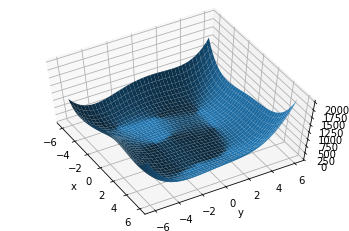

In [3]:
def himmelblau(x):
    # himmelblauÂáΩÊï∞ÂÆûÁé∞Ôºå‰º†ÂÖ•ÂèÇÊï∞x‰∏∫2‰∏™ÂÖÉÁ¥†ÁöÑList
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

# ÁªòÂà∂ÂáΩÊï∞ÂõæÂΩ¢
x = np.arange(-6, 6, 0.1) # ÂèØËßÜÂåñÁöÑxÂùêÊ†áËåÉÂõ¥‰∏∫-6~6
y = np.arange(-6, 6, 0.1) # ÂèØËßÜÂåñÁöÑyÂùêÊ†áËåÉÂõ¥‰∏∫-6~6
print('x,y range:', x.shape, y.shape)

# ÁîüÊàêx-yÂπ≥Èù¢ÈááÊ†∑ÁΩëÊ†ºÁÇπÔºåÊñπ‰æøÂèØËßÜÂåñ
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)

# ËÆ°ÁÆóÁΩëÊ†ºÁÇπ‰∏äÁöÑÂáΩÊï∞ÂÄº
Z = himmelblau([X, Y])

# ÁªòÂà∂ himmelblau ÂáΩÊï∞Êõ≤Èù¢
fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d') # ËÆæÁΩÆ3DÂùêÊ†áËΩ¥
ax.plot_surface(X, Y, Z) # 3DÊõ≤Èù¢Âõæ
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

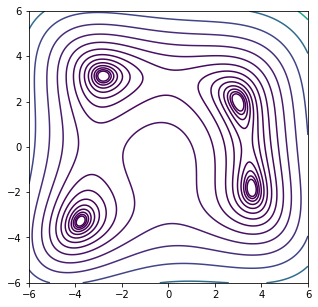

In [4]:
npts = 201
x1, y1 = np.mgrid[-6:6:npts*1j, -6:6:npts*1j]
z1 = himmelblau([x1, y1])

fig = plt.figure(figsize=(5, 5))
levels = np.logspace(0.3, 3.5, 15)
plt.contour(x1, y1, z1, levels, cmap="viridis")
# plt.xlabel(r"$x$", fontsize=14)
# plt.ylabel(r"$y$", fontsize=14)
# plt.xticks([-6, -3, 0, 3, 6])
# plt.yticks([-6, -3, 0, 3, 6])
# plt.xlim([-6, 6])
# plt.ylim([-6, 6])
plt.show()

‰ªé`Himmelblau`ÂáΩÊï∞ÁöÑÁ≠âÈ´òÁ∫øÂõæÂèØ‰ª•ÁúãÂá∫ÔºåÂÆÉÂÖ±Êúâ4‰∏™Âπ∂‰∏îÂ±ÄÈÉ®ÊûÅÂ∞èÂÄºÈÉΩÊòØ0ÔºåÊâÄ‰ª•Ëøô4‰∏™Â±ÄÈÉ®ÊûÅÂ∞èÂÄº‰πüÊòØÂÖ®Â±ÄÊúÄÂ∞èÂÄº„ÄÇÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáËß£ÊûêÁöÑÊñπÊ≥ïËÆ°ÁÆóÂá∫Â±ÄÈÉ®ÊûÅÂ∞èÂÄºÁöÑÁ≤æÁ°ÆÂùêÊ†áÔºåÂÆÉ‰ª¨ÂàÜÂà´ÊòØÔºö`(3,2), (‚àí2.805, 3.131), (‚àí3.779, ‚àí3.283), (3.584, ‚àí1.848)`„ÄÇ

Âà©Áî®`TensorFlow`Ëá™Âä®Ê±ÇÂØºÊù•Êõ¥Êñ∞$x$Âíå$y$ÂÄºÔºö

In [5]:
# ÂèÇÊï∞ÁöÑÂàùÂßãÂåñÂÄºÂØπ‰ºòÂåñÁöÑÂΩ±Âìç‰∏çÂÆπÂøΩËßÜÔºåÂèØ‰ª•ÈÄöËøáÂ∞ùËØï‰∏çÂêåÁöÑÂàùÂßãÂåñÂÄºÔºå
# Ê£ÄÈ™åÂáΩÊï∞‰ºòÂåñÁöÑÊûÅÂ∞èÂÄºÊÉÖÂÜµ
# [1., 0.], [-4, 0.], [4, 0.]
x = tf.constant([4., 0.]) # ÂàùÂßãÂåñÂèÇÊï∞
for step in range(200):# Âæ™ÁéØ‰ºòÂåñ200Ê¨°
    with tf.GradientTape() as tape: #Ê¢ØÂ∫¶Ë∑üË∏™
        tape.watch([x]) # Âä†ÂÖ•Ê¢ØÂ∫¶Ë∑üË∏™ÂàóË°®
        y = himmelblau(x) # ÂâçÂêë‰º†Êí≠
    # ÂèçÂêë‰º†Êí≠
    grads = tape.gradient(y, [x])[0]
    # Êõ¥Êñ∞ÂèÇÊï∞,0.01 ‰∏∫Â≠¶‰π†Áéá
    x -= 0.01*grads
    # ÊâìÂç∞‰ºòÂåñÁöÑÊûÅÂ∞èÂÄº
    if step % 20 == 19:
        print ('step {}: x = {}, f(x) = {}'.format(step, x.numpy(), y.numpy()))

step 19: x = [ 3.5381215 -1.3465767], f(x) = 3.7151756286621094
step 39: x = [ 3.5843277 -1.8470241], f(x) = 3.4506843803683296e-05
step 59: x = [ 3.584428  -1.8481253], f(x) = 4.206412995699793e-11
step 79: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 99: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 119: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 139: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 159: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 179: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 199: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13


ÁªèËøá200Ê¨°Ëø≠‰ª£Êõ¥Êñ∞ÂêéÔºåÊâæÂà∞ÁöÑÊï∞ÂÄºËß£‰∏éËß£ÊûêËß£‰πã‰∏Ä`(3.584, ‚àí1.848)`Âá†‰πé‰∏ÄÊ†∑„ÄÇ

ÂÆûÈôÖ‰∏äÔºåÈÄöËøáÊîπÂèòÁΩëÁªúÂèÇÊï∞ÁöÑÂàùÂßãÂåñÁä∂ÊÄÅÔºåÁ®ãÂ∫èÂèØ‰ª•ÂæóÂà∞Â§öÁßçÊûÅÂ∞èÂÄºÊï∞ÂÄºËß£„ÄÇÂèÇÊï∞ÁöÑÂàùÂßãÂåñÁä∂ÊÄÅÊòØÂèØËÉΩÂΩ±ÂìçÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÁöÑÊêúÁ¥¢ËΩ®ËøπÁöÑÔºåÁîöËá≥ÊúâÂèØËÉΩÊêúÁ¥¢Âá∫ÂÆåÂÖ®‰∏çÂêåÁöÑÊï∞ÂÄºËß£ÔºåÂ¶Ç`Ë°®7.1`ÊâÄÁ§∫„ÄÇ

<img src="images/t_07_01.png" style="width:400px;"/>

## 7.9 ÂèçÂêë‰º†Êí≠ÁÆóÊ≥ïÂÆûÊàò
Êú¨ËäÇÂà©Áî®ÂâçÈù¢‰ªãÁªçÁöÑÂ§öÂ±ÇÂÖ®ËøûÊé•ÁΩëÁªúÁöÑÊ¢ØÂ∫¶Êé®ÂØºÁªìÊûúÔºåÁõ¥Êé•Âà©Áî®`Python`Âæ™ÁéØËÆ°ÁÆóÊØè‰∏ÄÂ±ÇÁöÑÊ¢ØÂ∫¶ÔºåÂπ∂ÊåâÁùÄÊ¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÊâãÂä®Êõ¥Êñ∞„ÄÇ

Êàë‰ª¨Â∞ÜÂÆûÁé∞‰∏Ä‰∏™4Â±ÇÁöÑÂÖ®ËøûÊé•ÁΩëÁªúÔºåÊù•ÂÆåÊàê‰∫åÂàÜÁ±ª‰ªªÂä°„ÄÇÁΩëÁªúËæìÂÖ•ËäÇÁÇπÊï∞‰∏∫2ÔºåÈöêËóèÂ±ÇÁöÑËäÇÁÇπÊï∞ËÆæËÆ°‰∏∫Ôºö25„ÄÅ50Âíå25ÔºåËæìÂá∫Â±Ç2‰∏™ËäÇÁÇπÔºåÂ¶Ç`Âõæ7.13`ÊâÄÁ§∫„ÄÇËøôÈáåÂπ∂Ê≤°ÊúâÈááÁî®`Softmax`ÂáΩÊï∞Â∞ÜÁΩëÁªúËæìÂá∫Ê¶ÇÁéáÂÄº‰πãÂíåËøõË°åÁ∫¶ÊùüÔºåËÄåÊòØÁõ¥Êé•Âà©Áî®`MSE`ÂáΩÊï∞ËÆ°ÁÆó‰∏é`onehot`ÁºñÁ†ÅÁöÑÁúüÂÆûÊ†áÁ≠æ‰πãÈó¥ÁöÑËØØÂ∑ÆÔºåÊâÄÊúâÁöÑÁΩëÁªúÊøÄÊ¥ªÂáΩÊï∞ÂÖ®ÈÉ®ÈááÁî®`Sigmoid`ÂáΩÊï∞„ÄÇ

<img src="images/07_11.png" style="width:500px;"/>

### 7.9.1 Êï∞ÊçÆÈõÜ
‰ΩøÁî®`scikit-learn`Â∫ìÁîüÊàê`2000`‰∏™Á∫øÊÄß‰∏çÂèØÂàÜÁöÑ‰∫åÂàÜÁ±ªÊï∞ÊçÆÈõÜÔºåÂàÜÂ∏ÉÂ¶Ç‰∏ãÂõæÊâÄÁ§∫„ÄÇ

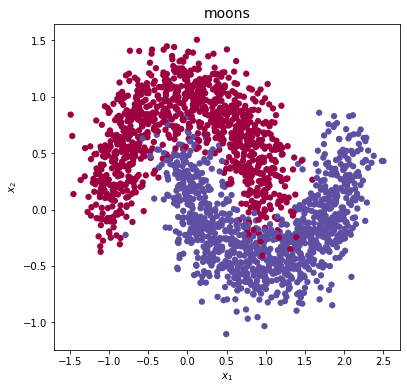

In [6]:
def load_dataset():
    # ÈááÊ†∑ÁÇπÊï∞
    N_SAMPLES = 2000
    # ÊµãËØïÊï∞ÈáèÊØîÁéá
    TEST_SIZE = 0.3
    # Âà©Áî®Â∑•ÂÖ∑ÂáΩÊï∞Áõ¥Êé•ÁîüÊàêÊï∞ÊçÆÈõÜ
    X, y = make_moons(n_samples=N_SAMPLES, noise=0.2, random_state=100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
    return X, y, X_train, X_test, y_train, y_test


def make_plot(X, y, plot_name, XX=None, YY=None, preds=None, dark=False):
    # ÁªòÂà∂Êï∞ÊçÆÈõÜÁöÑÂàÜÂ∏ÉÔºåX‰∏∫2DÂùêÊ†áÔºåy‰∏∫Êï∞ÊçÆÁÇπÁöÑÊ†áÁ≠æ
    if (dark):
        plt.style.use('dark_background')
    plt.figure(figsize=(8, 6))
    axes = plt.gca()
    axes.set(xlabel="$x_1$", ylabel="$x_2$")
    plt.title(plot_name, fontsize=14)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if XX is not None and YY is not None and preds is not None:
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha=1, cmap=plt.cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    # ÁªòÂà∂Êï£ÁÇπÂõæÔºåÊ†πÊçÆÊ†áÁ≠æÂå∫ÂàÜÈ¢úËâ≤
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='none')
    plt.show()

X, y, X_train, X_test, y_train, y_test = load_dataset()
make_plot(X, y, "moons")

### 7.9.2 ÁΩëÁªúÂ±Ç
`LayerÁ±ª`ÂÆûÁé∞‰∏Ä‰∏™ÁΩëÁªúÂ±ÇÔºö

In [7]:
# ÂÖ®ËøûÊé•ÁΩëÁªúÂ±Ç
class Layer:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        # ÈÄöËøáÊ≠£ÊÄÅÂàÜÂ∏ÉÂàùÂßãÂåñÁΩëÁªúÊùÉÂÄºÔºåÂàùÂßãÂåñÈùûÂ∏∏ÈáçË¶ÅÔºå‰∏çÂêàÈÄÇÁöÑÂàùÂßãÂåñÂ∞ÜÂØºËá¥ÁΩëÁªú‰∏çÊî∂Êïõ
        self.weights = weights if weights is not None else np.random.randn(n_input,n_neurons)*np.sqrt(1/n_neurons)
        self.bias = bias if bias is not None else np.random.rand(n_neurons)*0.1
        self.activation = activation
        self.last_activation = None  # ÊøÄÊ¥ªÂáΩÊï∞ÁöÑËæìÂá∫ÂÄºo
        self.error = None  # Áî®‰∫éËÆ°ÁÆóÂΩìÂâçÂ±ÇÁöÑdeltaÂèòÈáèÁöÑ‰∏≠Èó¥ÂèòÈáè
        self.delta = None  # ËÆ∞ÂΩïÂΩìÂâçÂ±ÇÁöÑdeltaÂèòÈáèÔºåÁî®‰∫éËÆ°ÁÆóÊ¢ØÂ∫¶

    # ÁΩëÁªúÂ±ÇÁöÑÂâçÂêë‰º†Êí≠ÂáΩÊï∞ÂÆûÁé∞Â¶Ç‰∏ãÔºåÂÖ∂‰∏≠last_activationÂèòÈáèÁî®‰∫é‰øùÂ≠òÂΩìÂâçÂ±ÇÁöÑËæìÂá∫ÂÄºÔºö
    def activate(self, x):
        # ÂâçÂêë‰º†Êí≠ÂáΩÊï∞, X@W+b
        r = np.dot(x, self.weights) + self.bias  
        # ÈÄöËøáÊøÄÊ¥ªÂáΩÊï∞ÔºåÂæóÂà∞ÂÖ®ËøûÊé•Â±ÇÁöÑËæìÂá∫o
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    # self._apply_activationÂáΩÊï∞ÂÆûÁé∞‰∫Ü‰∏çÂêåÁ±ªÂûãÁöÑÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂâçÂêëËÆ°ÁÆóËøáÁ®ã
    def _apply_activation(self, r):
        # ËÆ°ÁÆóÊøÄÊ¥ªÂáΩÊï∞ÁöÑËæìÂá∫
        if self.activation is None:
            return r
        elif self.activation == 'relu':
            return np.maximum(r, 0)
        elif self.activation == 'tanh':
            return np.tanh(r)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    # ÈíàÂØπ‰∫é‰∏çÂêåÁ±ªÂûãÁöÑÊøÄÊ¥ªÂáΩÊï∞ÔºåÂÆÉ‰ª¨ÁöÑÂØºÊï∞ËÆ°ÁÆóÂÆûÁé∞Â¶Ç‰∏ãÔºö
    def apply_activation_derivative(self, r):
        # Êó†ÊøÄÊ¥ªÂáΩÊï∞ÔºåÂØºÊï∞‰∏∫1
        if self.activation is None:
            return np.ones_like(r)
        # ReLUÂáΩÊï∞ÁöÑÂØºÊï∞ÂÆûÁé∞
        elif self.activation == 'relu':
            grad = np.array(r, copy=True)
            grad[r > 0] = 1.
            grad[r <= 0] = 0.
            return grad
        # tanhÂáΩÊï∞ÁöÑÂØºÊï∞ÂÆûÁé∞
        elif self.activation == 'tanh':
            return 1 - r ** 2
        # SigmoidÂáΩÊï∞ÁöÑÂØºÊï∞ÂÆûÁé∞
        elif self.activation == 'sigmoid':
            return r * (1 - r)
        return r

### 7.9.3 ÁΩëÁªúÊ®°Âûã
`NeuralNetwork`Á±ªÂÜÖÈÉ®Áª¥Êä§ÂêÑÂ±ÇÁöÑÁΩëÁªúÂ±Ç`Layer`Á±ªÂØπË±°Ôºö

In [8]:
# Á•ûÁªèÁΩëÁªúÊ®°Âûã
class NeuralNetwork:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    # ÁΩëÁªúÁöÑÂâçÂêë‰º†Êí≠Âè™ÈúÄË¶ÅÂæ™ÁéØË∞ÉÂêÑ‰∏™ÁΩëÁªúÂ±ÇÂØπË±°ÁöÑÂâçÂêëËÆ°ÁÆóÂáΩÊï∞Âç≥ÂèØ
    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X
    
    # ÂèçÂêë‰º†Êí≠ÁÆóÊ≥ïÂÆûÁé∞
    def backpropagation(self, X, y, learning_rate):
        # ÂâçÂêëËÆ°ÁÆóÔºåÂæóÂà∞ËæìÂá∫ÂÄº
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):  # ÂèçÂêëÂæ™ÁéØ
            layer = self._layers[i]  # ÂæóÂà∞ÂΩìÂâçÂ±ÇÂØπË±°
            # Â¶ÇÊûúÊòØËæìÂá∫Â±Ç
            if layer == self._layers[-1]:
                layer.error = y - output  # ËÆ°ÁÆó2ÂàÜÁ±ª‰ªªÂä°ÁöÑÂùáÊñπÂ∑ÆÁöÑÂØºÊï∞
                # ÂÖ≥ÈîÆÊ≠•È™§ÔºöËÆ°ÁÆóÊúÄÂêé‰∏ÄÂ±ÇÁöÑdeltaÔºåÂèÇËÄÉËæìÂá∫Â±ÇÁöÑÊ¢ØÂ∫¶ÂÖ¨Âºè
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:  # Â¶ÇÊûúÊòØÈöêËóèÂ±Ç
                next_layer = self._layers[i + 1]  # ÂæóÂà∞‰∏ã‰∏ÄÂ±ÇÂØπË±°
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                # ÂÖ≥ÈîÆÊ≠•È™§ÔºöËÆ°ÁÆóÈöêËóèÂ±ÇÁöÑdeltaÔºåÂèÇËÄÉÈöêËóèÂ±ÇÁöÑÊ¢ØÂ∫¶ÂÖ¨Âºè
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        # Âæ™ÁéØÊõ¥Êñ∞ÊùÉÂÄº
        for i in range(len(self._layers)):
            layer = self._layers[i]
            # o_i‰∏∫‰∏ä‰∏ÄÁΩëÁªúÂ±ÇÁöÑËæìÂá∫
            o_i = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            # Ê¢ØÂ∫¶‰∏ãÈôçÁÆóÊ≥ïÔºådeltaÊòØÂÖ¨Âºè‰∏≠ÁöÑË¥üÊï∞ÔºåÊïÖËøôÈáåÁî®Âä†Âè∑
            layer.weights += layer.delta * o_i.T * learning_rate

    def train(self, X_train, X_test, y_train, y_test, learning_rate, max_epochs):
        y_onehot = np.zeros((y_train.shape[0], 2))
        y_onehot[np.arange(y_train.shape[0]), y_train] = 1
        # Â∞ÜOnehotÁºñÁ†ÅÂêéÁöÑÁúüÂÆûÊ†áÁ≠æ‰∏éÁΩëÁªúÁöÑËæìÂá∫ËÆ°ÁÆóÂùáÊñπËØØÂ∑ÆÔºåÂπ∂Ë∞ÉÁî®ÂèçÂêë‰º†Êí≠ÂáΩÊï∞Êõ¥Êñ∞ÁΩëÁªúÂèÇÊï∞ÔºåÂæ™ÁéØËø≠‰ª£ËÆ≠ÁªÉÈõÜ1000ÈÅçÂç≥ÂèØ
        mses = []
        accuracys = []
        for i in range(max_epochs + 1):  # ËÆ≠ÁªÉ1000 ‰∏™epoch
            for j in range(len(X_train)):  # ‰∏ÄÊ¨°ËÆ≠ÁªÉ‰∏Ä‰∏™Ê†∑Êú¨
                self.backpropagation(X_train[j], y_onehot[j], learning_rate)
            if i % 100 == 0:
                # ÊâìÂç∞Âá∫MSE Loss
                mse = np.mean(np.square(y_onehot - self.feed_forward(X_train)))
                mses.append(mse)
                accuracy = self.accuracy(self.predict(X_test), y_test.flatten())
                accuracys.append(accuracy)
                print('Epoch: #%s, MSE: %f' % (i, float(mse)))
                # ÁªüËÆ°Âπ∂ÊâìÂç∞ÂáÜÁ°ÆÁéá
                print('Accuracy: %.2f%%' % (accuracy * 100))
        return mses, accuracys

    def predict(self, X):
        return self.feed_forward(X)

    def accuracy(self, X, y):
        return np.sum(np.equal(np.argmax(X, axis=1), y)) / y.shape[0]

ËÆ≠ÁªÉÊ®°ÂûãÔºö

Epoch: #0, MSE: 0.250198
Accuracy: 49.50%
Epoch: #100, MSE: 0.096040
Accuracy: 88.83%
Epoch: #200, MSE: 0.095081
Accuracy: 88.83%
Epoch: #300, MSE: 0.092835
Accuracy: 89.17%
Epoch: #400, MSE: 0.090202
Accuracy: 89.83%
Epoch: #500, MSE: 0.083936
Accuracy: 92.00%
Epoch: #600, MSE: 0.079681
Accuracy: 92.83%
Epoch: #700, MSE: 0.060048
Accuracy: 95.50%
Epoch: #800, MSE: 0.034868
Accuracy: 96.33%
Epoch: #900, MSE: 0.029502
Accuracy: 97.00%
Epoch: #1000, MSE: 0.027350
Accuracy: 97.00%


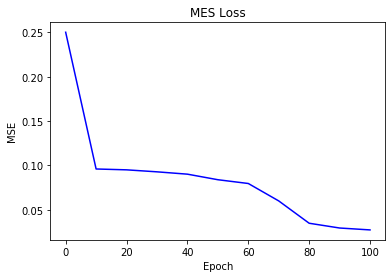

In [9]:
X, y, X_train, X_test, y_train, y_test = load_dataset()

nn = NeuralNetwork()  # ÂÆû‰æãÂåñÁΩëÁªúÁ±ª
nn.add_layer(Layer(2, 25, 'sigmoid'))  # ÈöêËóèÂ±Ç 1, 2=>25
nn.add_layer(Layer(25, 50, 'sigmoid'))  # ÈöêËóèÂ±Ç 2, 25=>50
nn.add_layer(Layer(50, 25, 'sigmoid'))  # ÈöêËóèÂ±Ç 3, 50=>25
nn.add_layer(Layer(25, 2, 'sigmoid'))  # ËæìÂá∫Â±Ç, 25=>2
mses, accuracys = nn.train(X_train, X_test, y_train, y_test, 0.01, 1000)

x = [i for i in range(0, 101, 10)]
# ÁªòÂà∂MESÊõ≤Á∫ø
plt.title("MES Loss")
plt.plot(x, mses[:11], color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE')
# plt.savefig('ËÆ≠ÁªÉËØØÂ∑ÆÊõ≤Á∫ø.svg')
plt.show()

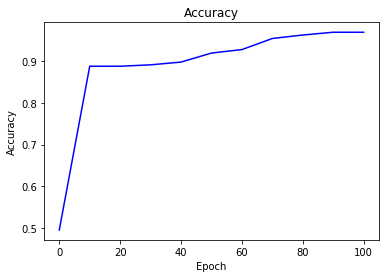

In [10]:
# ÁªòÂà∂AccuracyÊõ≤Á∫ø
plt.title("Accuracy")
plt.plot(x, accuracys[:11], color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.savefig('ÁΩëÁªúÊµãËØïÂáÜÁ°ÆÁéá.svg')
plt.show()